## Problem Statement:

* **Context:** A retail firm has many products in their inventory, and very few of them tend to sell (only about 10% sell each year) and many of the products only have a single sale in the course of a year

* **Objective:** The sales and growth team of the retail firm wants to determine which products from their inventory should they retain to sell and the ones to discard 

* **Data:** The data given contains both historical sales data AND active inventory

* **Goal:** We have a to building a binary classifier which gives us a list of product ID which need to retained in the inventory or list of products that need to be removed


In [1]:

# loading important modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import *

import itertools

%matplotlib inline
matplotlib.style.use('ggplot')

import os
print(os.listdir())

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', '15th_16thfeb.ipynb', 'numpy_tutorial.ipynb', 'oscars_demographics.csv', 'Pandas and Viz.ipynb', 'Pandas_only.ipynb', 'Session 1.pptx', 'Session 2', 'Session 2.zip']


In [2]:
os.getcwd()

'C:\\Users\\ashwinku\\Documents\\training'

In [3]:
# Reading the dataset
sales_data = pd.read_csv("SalesKaggle3.csv")

FileNotFoundError: [Errno 2] File SalesKaggle3.csv does not exist: 'SalesKaggle3.csv'

In [23]:
# Gist of the dataset
sales_data.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [24]:
help(sales_data['SoldFlag'].astype)

Help on method astype in module pandas.core.generic:

astype(dtype, copy=True, errors='raise', **kwargs) method of pandas.core.series.Series instance
    Cast a pandas object to a specified dtype ``dtype``.
    
    Parameters
    ----------
    dtype : data type, or dict of column name -> data type
        Use a numpy.dtype or Python type to cast entire pandas object to
        the same type. Alternatively, use {col: dtype, ...}, where col is a
        column label and dtype is a numpy.dtype or Python type to cast one
        or more of the DataFrame's columns to column-specific types.
    copy : bool, default True
        Return a copy when ``copy=True`` (be very careful setting
        ``copy=False`` as changes to values then may propagate to other
        pandas objects).
    errors : {'raise', 'ignore'}, default 'raise'
        Control raising of exceptions on invalid data for provided dtype.
    
        - ``raise`` : allow exceptions to be raised
        - ``ignore`` : suppress 

In [27]:
#Statistical description of the dataset
sales_data['SoldFlag'] = sales_data['SoldFlag'].astype('category')
sales_data.describe()

,Order,SKU_number,SoldCount,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,198917.000000,1.989170e+05,75996.000000,198917.000000,198917.000000,1.989170e+05,198917.000000,198917.000000,198917.000000,198917.000000,198917.000000
mean,106483.543242,8.613626e+05,0.322306,3.412202,0.642248,1.117115e+06,90.895243,2006.016414,41.426283,30.982487,46.832053
std,60136.716784,8.699794e+05,1.168615,3.864243,0.479340,1.522090e+06,86.736367,9.158331,37.541215,69.066155,128.513236
min,2.000000,5.000100e+04,0.000000,0.000000,0.000000,6.275000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55665.000000,2.172520e+05,0.000000,1.000000,0.000000,1.614188e+05,42.000000,2003.000000,21.000000,4.910000,17.950000
50%,108569.000000,6.122080e+05,0.000000,2.000000,1.000000,5.822240e+05,69.950000,2007.000000,32.000000,16.080000,33.980000
75%,158298.000000,9.047510e+05,0.000000,5.000000,1.000000,1.430083e+06,116.000000,2011.000000,50.000000,40.240000,55.490000
max,208027.000000,3.960788e+06,73.000000,99.000000,1.000000,1.738445e+07,12671.480000,2018.000000,2542.000000,14140.210000,19138.790000


In [29]:
# Includes categorical variable 
sales_data.describe(include=['object','category'])

,File_Type,SoldFlag,MarketingType
count,198917,75996.0,198917
unique,2,2.0,2
top,Active,0.0,S
freq,122921,63000.0,100946


In [31]:
# Basic questions about the dataset

# 1. Number of enteries 
print(sales_data.shape)
# We have 198917 rows and 14 columns 

# 2. Total number of products & unique values of the columns 
print("*****************")
print(sales_data.nunique())

# 3. Count of the historical and active state 
print("*****************")
print(sales_data[sales_data['File_Type'] == 'Historical']['SKU_number'].count())
print(sales_data[sales_data['File_Type'] == 'Active']['SKU_number'].count())

# 3.1 Split the dataset into two parts based on the file_type 
sales_data_hist = sales_data[sales_data['File_Type'] == 'Historical']
sales_data_act = sales_data[sales_data['File_Type'] == 'Active']


(198917, 14)
*****************
Order               198917
File_Type                2
SKU_number          133360
SoldFlag                 2
SoldCount               37
MarketingType            2
ReleaseNumber           71
New_Release_Flag         2
StrengthFactor      197424
PriceReg             11627
ReleaseYear             85
ItemCount              501
LowUserPrice         12102
LowNetPrice          15403
dtype: int64
*****************
75996
122921


### Note: We will be using the historical dataset for the analysis and training the model 

## Univariate distribution plots 

This section shows a frequency histogram for the selected variable along with the density and normal curves for the data

The box plot shows the basic statistics of the data like median, 25th and 75th quantiles and the outliers.

### Categorical Variable

Shows the frequency distribution of the difference factors

In [32]:
test = sales_data['MarketingType'].value_counts()
help(test.plot)

Help on SeriesPlotMethods in module pandas.plotting._core object:

class SeriesPlotMethods(BasePlotMethods)
 |  SeriesPlotMethods(data)
 |  
 |  Series plotting accessor and method.
 |  
 |  Examples
 |  --------
 |  >>> s.plot.line()
 |  >>> s.plot.bar()
 |  >>> s.plot.hist()
 |  
 |  Plotting methods can also be accessed by calling the accessor as a method
 |  with the ``kind`` argument:
 |  ``s.plot(kind='line')`` is equivalent to ``s.plot.line()``
 |  
 |  Method resolution order:
 |      SeriesPlotMethods
 |      BasePlotMethods
 |      pandas.core.base.PandasObject
 |      pandas.core.base.StringMixin
 |      pandas.core.accessor.DirNamesMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, kind='line', ax=None, figsize=None, use_index=True, title=None, grid=None, legend=False, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, l

In [33]:
sales_data['MarketingType'].value_counts()

S    100946
D     97971
Name: MarketingType, dtype: int64

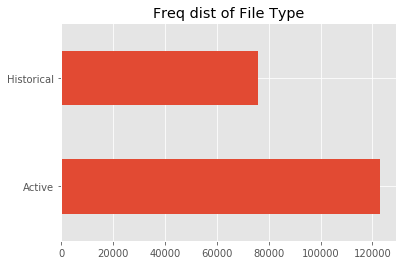

In [35]:
sales_data['File_Type'].value_counts().plot(kind= 'barh',title="Freq dist of File Type")

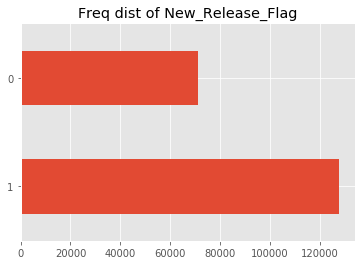

In [36]:
sales_data['New_Release_Flag'].value_counts().plot.barh(title="Freq dist of New_Release_Flag")

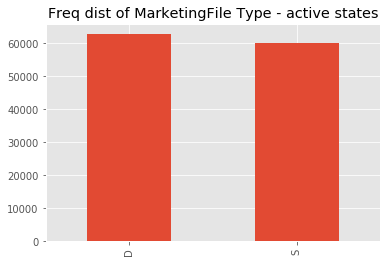

In [37]:
sales_data_act['MarketingType'].value_counts().plot.bar(title="Freq dist of MarketingFile Type - active states")

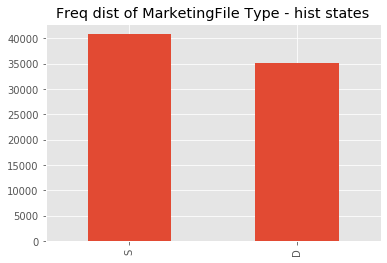

In [38]:
sales_data_hist['MarketingType'].value_counts().plot.bar(title="Freq dist of MarketingFile Type - hist states")

In [40]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, optional, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (`sharex`) or y (`sharey`)
        axes:
    
            - True or 'all': x- or y-axis will be shared among all
              subplots.
            - False or 'none': each subplot x- or y-axis will be
              independent.
            - 'row': each subplot row will share an x- or y-axis.
            - 'col': each subplot column will share an x- or y-axis.
    
        Wh

### Numeric Variable 

Plots with a kernel density estimate and histogram with bin size determined automatically


AxesSubplot(0.125,0.772143;0.775x0.107857)
0
1
2
3
4
5


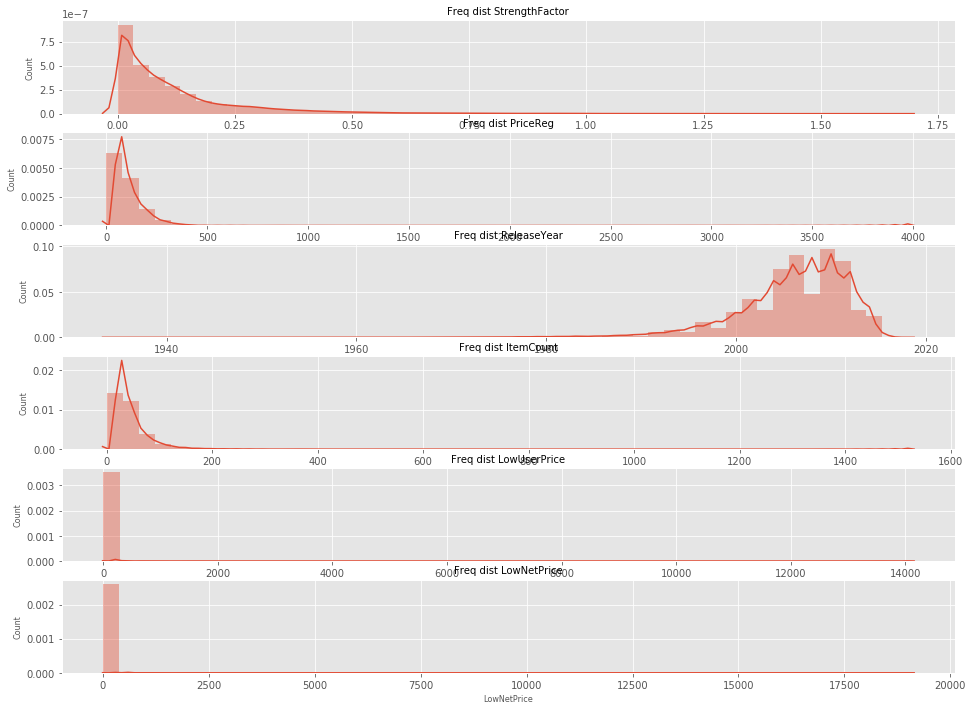

In [43]:
col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))


print (ax[0])
for i, col_val in enumerate(col_names):
    print (i)   
    sns.distplot(sales_data_hist[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.show()

In [44]:
for col_val in col_names:
#     print (i)
    print (col_val)

StrengthFactor
PriceReg
ReleaseYear
ItemCount
LowUserPrice
LowNetPrice


In [ ]:
sns.distplot(sales_data_hist[col_val], hist=True, ax=ax[i])
ax[i].set_title('Freq dist '+col_val, fontsize=10)
ax[i].set_xlabel(col_val, fontsize=8)
ax[i].set_ylabel('Count', fontsize=8)

Help on AxesSubplot in module matplotlib.axes._subplots object:

class AxesSubplot(SubplotBase, matplotlib.axes._axes.Axes)
 |  AxesSubplot(fig, *args, **kwargs)
 |  
 |  Base class for subplots, which are :class:`Axes` instances with
 |  additional methods to facilitate generating and manipulating a set
 |  of :class:`Axes` within a figure.
 |  
 |  Method resolution order:
 |      AxesSubplot
 |      SubplotBase
 |      matplotlib.axes._axes.Axes
 |      matplotlib.axes._base._AxesBase
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods inherited from SubplotBase:
 |  
 |  __init__(self, fig, *args, **kwargs)
 |      *fig* is a :class:`matplotlib.figure.Figure` instance.
 |      
 |      *args* is the tuple (*numRows*, *numCols*, *plotNum*), where
 |      the array of subplots in the figure has dimensions *numRows*,
 |      *numCols*, and where *plotNum* is the number of the subplot
 |      being created.  *plotNum* starts at 1 in the upper left
 |      corner a

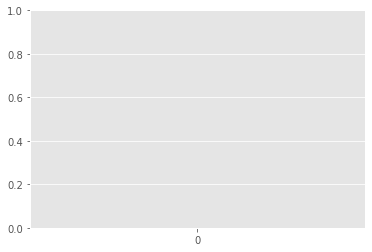

In [44]:
help(sns.boxplot())

### Univariate outlier detection 

To analysis the outliers in the numeric features of the dataset 

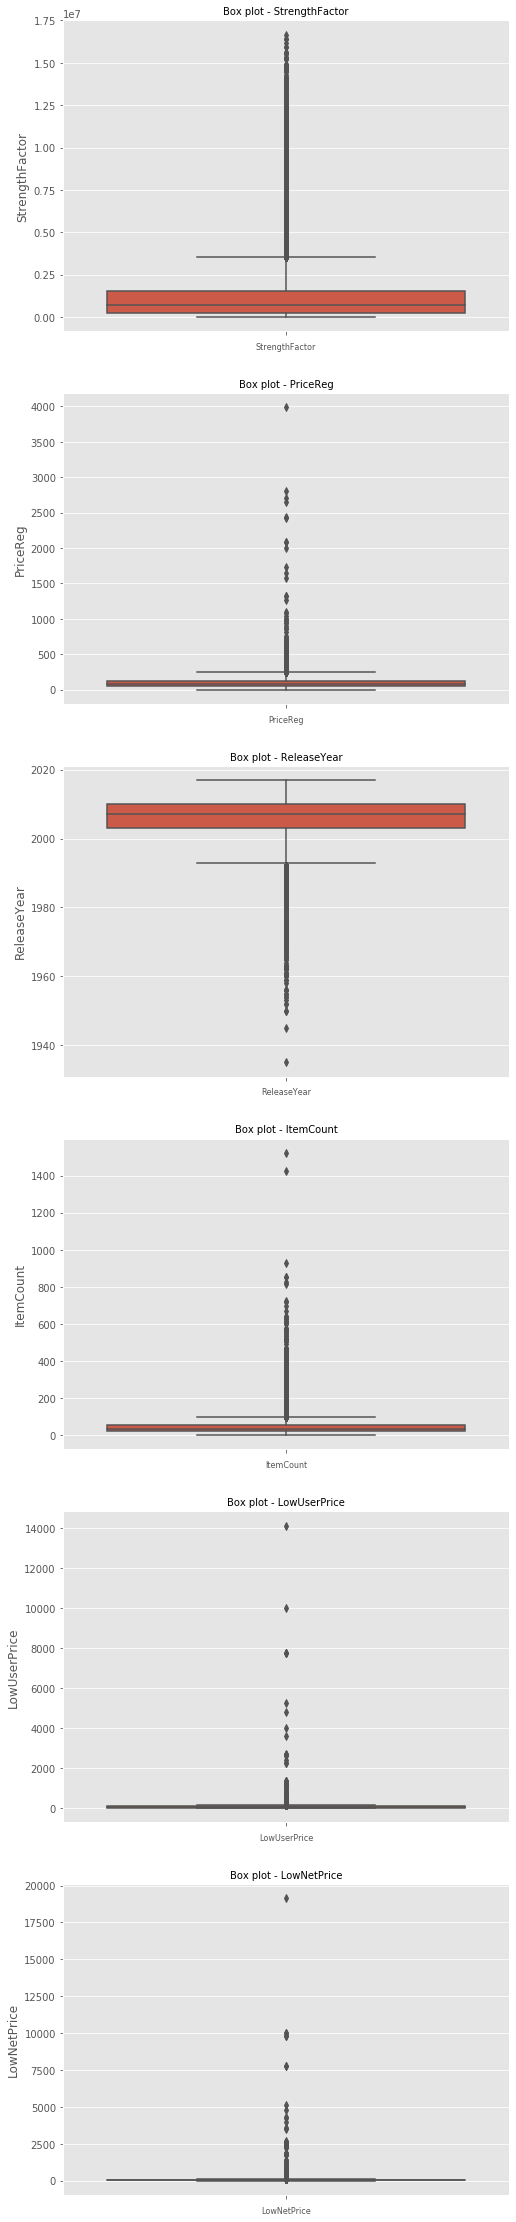

In [43]:
col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
        
    sns.boxplot(y=sales_data_hist[col_val], ax=ax[i])
    ax[i].set_title('Box plot - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

midlle - median 


Q1 - 1.5*inter quatile range 
75th+ 1.5* inter qua
q3-q1 = inter

2nd evry above -- is safe as outlier
1. actually drp them 
2. Capping ---- all the values whch areabove maximim - we will them equal to ut amximim -- all minimum b
3. percetile 99th percentile 

### Bivariate plots 

To plot multiple pairwise bivariate distributions in a dataset

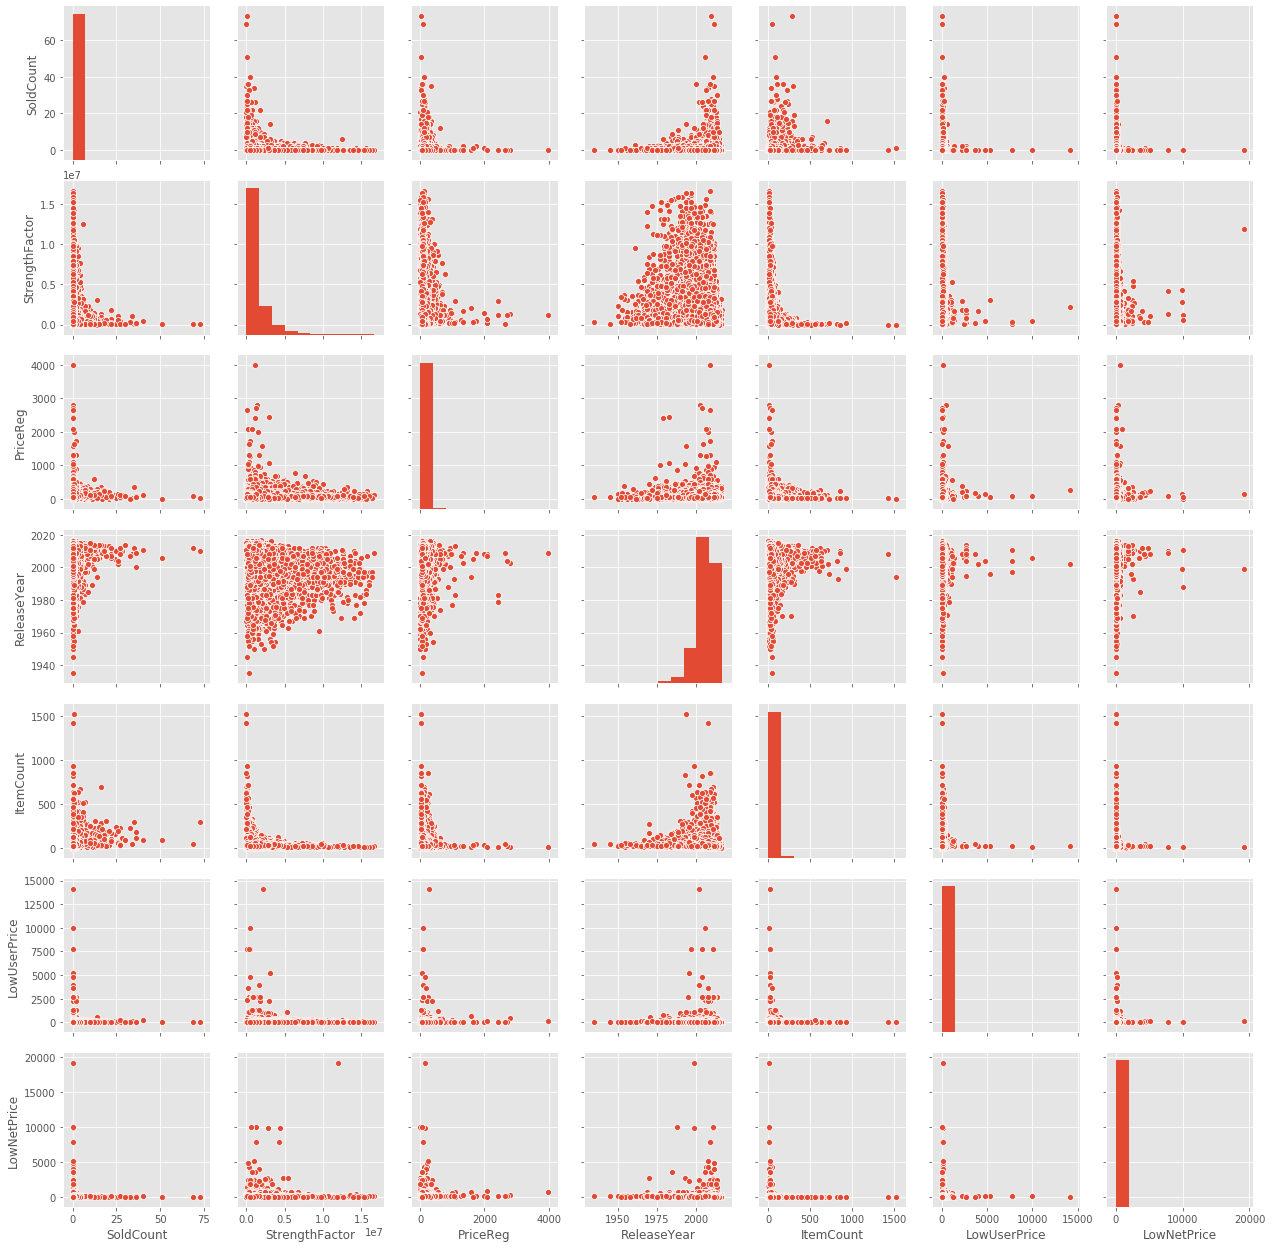

In [45]:
sales_data_hist = sales_data_hist.drop(['Order', 'File_Type','SKU_number','SoldFlag','MarketingType','ReleaseNumber','New_Release_Flag'], axis=1)
sns.pairplot(sales_data_hist)

### Correlation plot

Positively correlated variables will have correlation value close to +1 and negatively correlated variables will have correlation value close to -1.

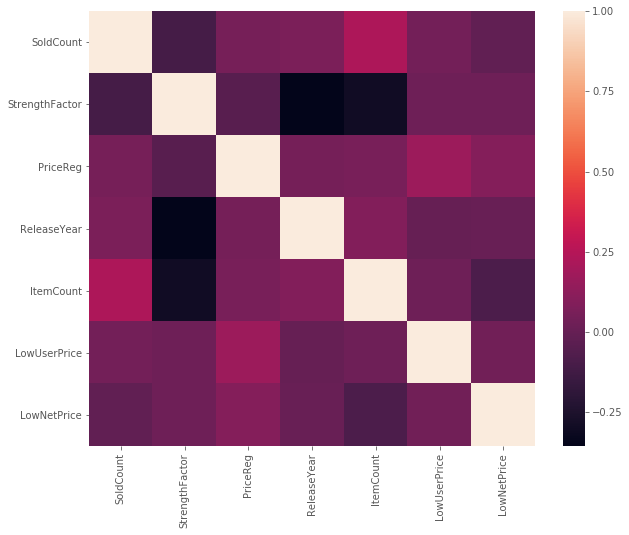

In [46]:
f, ax = plt.subplots(figsize=(10, 8))
corr = sales_data_hist.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [47]:
help(sales_data_hist.corr())

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame)
 |  DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
 |  
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, argument order is maintained for Python 3.6
 |         and later.
 |  
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to RangeIndex if
 |      no indexing information part of input data and no index provided
 |  columns : Index or arr

### Univariate Outlier treatment

Many algorithms are sensitive to the range and distribution of attribute values in the input data. Outliers in input data can skew and mislead the results and make results less reliable, that's why we have to recognize all the outliers and treat them.

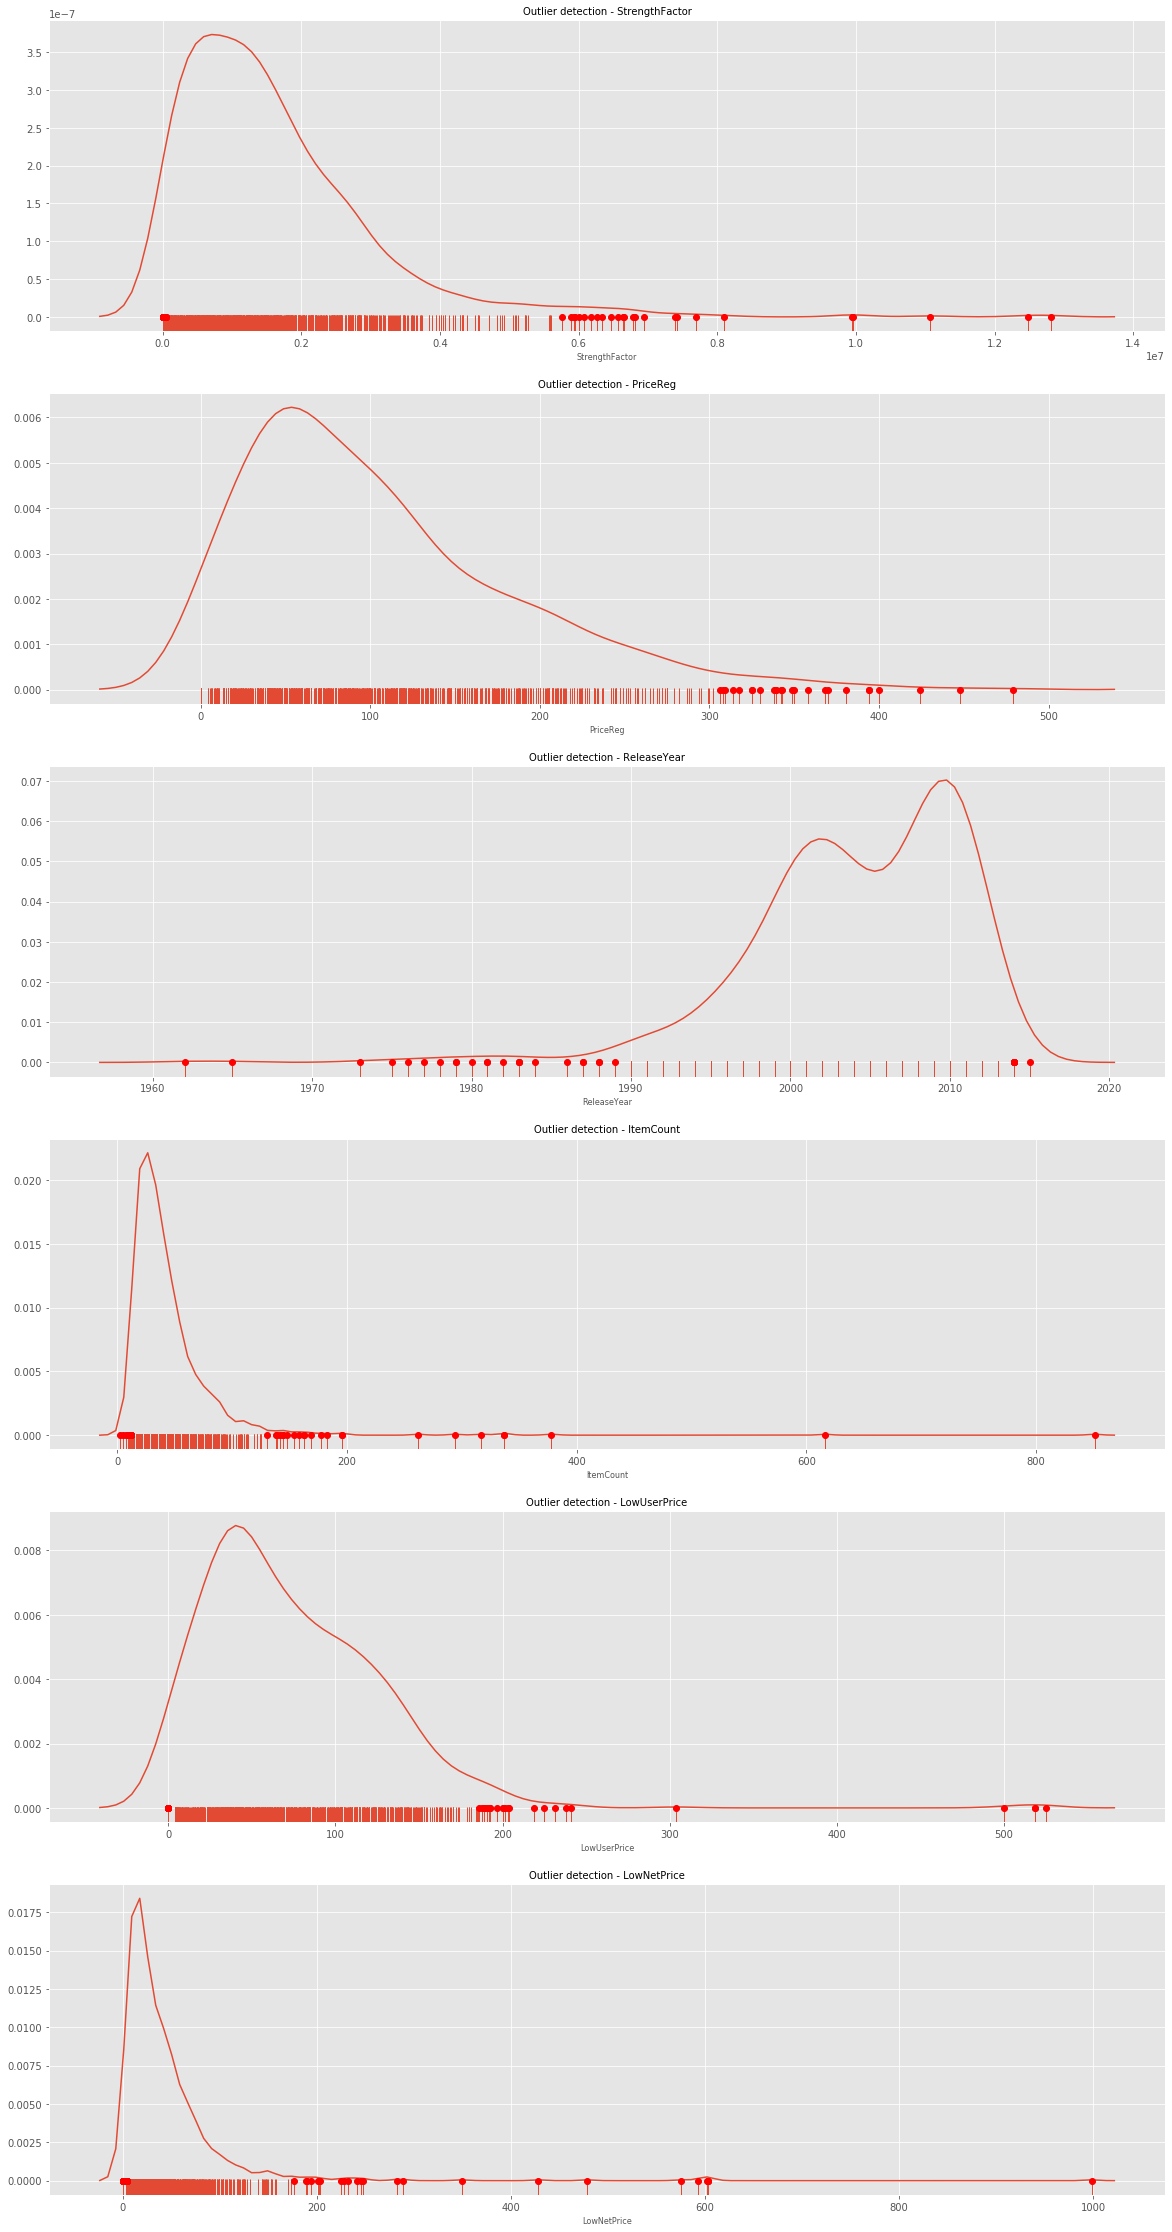

In [26]:
# Percentile based outlier removal 
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(col_names), figsize=(20,40))

for i, col_val in enumerate(col_names):
    x = sales_data_hist[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
#     print (outliers)
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

## Predictive Modelling

The classification module predicts the SKU which needs to kept in the inventory (Active state) 

In [22]:
# Converting maarketing type to categorical variable 
sales_data['MarketingType'] = sales_data['MarketingType'].astype('category')
sales_data['MarketingType'] = sales_data['MarketingType'].cat.codes

# Splitting the historical and active state
sales_data_hist = sales_data[sales_data['File_Type'] == 'Historical']
sales_data_act = sales_data[sales_data['File_Type'] == 'Active']

In [20]:
# Columns to remove 
remove_col_val = ['Order', 'File_Type', 'SKU_number', 'SoldCount', 'ReleaseNumber', 'SoldFlag']

y = sales_data_hist['SoldFlag']

sales_data_hist = sales_data_hist.drop(remove_col_val, axis=1)
sales_data_act = sales_data_act.drop(remove_col_val, axis=1)

# create training and testing vars
training_features, testing_features, training_target, testing_target = train_test_split(sales_data_hist, y, test_size=0.2)
print(training_features.shape, training_target.shape)
print(testing_features.shape, testing_target.shape)

In [21]:
print("Class 0 numbers: " , len(training_target[training_target==0.0]))
print("Class 1 numbers: " , len(training_target[training_target==1.0]))

In [22]:
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = .1,
                                                  random_state=12)

In [23]:
# Balancing the classes using SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

print("Class 0 numbers: " , len(y_train_res[y_train_res==0.0]))
print("Class 1 numbers: " , len(y_train_res[y_train_res==1.0]))

In [24]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

In [25]:
print('Validation Results')
print(clf_rf.score(x_val, y_val))
print(recall_score(y_val, clf_rf.predict(x_val)))

pred = clf_rf.predict(testing_features)

print('\nTest Results')
print(clf_rf.score(testing_features, testing_target))
print(recall_score(testing_target, pred))

print('\nROC AUC score')
print(roc_auc_score(testing_target, pred))

### Confusion Matrix

In [26]:
class_names = ['Not Sold', 'Sold']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(testing_target, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### ROC

In [27]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
y_score = clf_rf.predict_proba(testing_features)

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(testing_target.ravel(), y_score[:,1].ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2

plt.plot(fpr['micro'], tpr['micro'], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['micro'])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [ ]:
Scatter Plots : Bivariate Analysis | Ditribution of data | 
1. Outliers 
2. scatter numeric & caterical(1,0) --- variable 
3. how the values of one variables is changing as corerspning | if you have sorted | correlation

Heat Map :
row columns --- 0,1 --- correlation
heat map on maps

Boxplot - range of data ---

Line Charts -- shw a trend - sales by year 
piecharts


In [ ]:
seaborn plot can 99% of -- concentarte
healp